Name - Vishal Kumar
Roll no - 226101005

Question 1

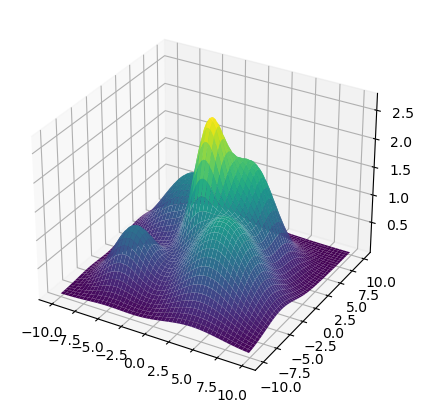

In [4]:
# multimodal test function

from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# objective function
def objective(x, y):
        return 1.7 * exp(-1 * (0.1 * ((x-3)**2 + (y-3)**2))) + exp(-1 * (((x+5)**2 + (y+5)**2)/8)) + 2 * exp(-1 * ((x**2)/4 + (y**2)/5)) + 1.5 * exp(-1 * ((((x-4)**2)/18) + (((y+4)**2)/16))) + 1.25 * exp(-1 * ((((x+4)**2)/18) + (((y-4)**2)/16)))
# define range for input
r_min, r_max = -10.0, 10.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure(figsize = (5,5))
axis = plt.subplot(projection='3d')
axis.plot_surface(x, y, results, cmap='viridis')

Question 2

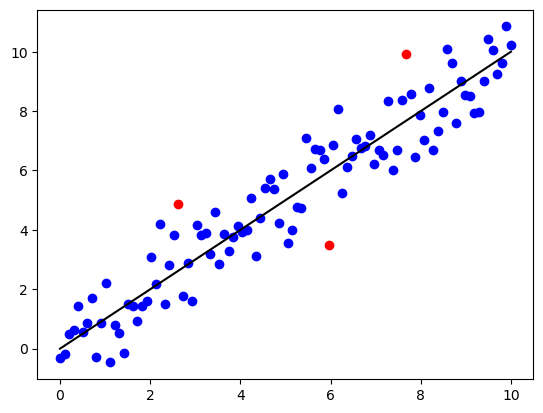

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generateDataset(a, b, xmin, xmax, n, alpha, sigma):
    x = np.linspace(xmin, xmax, n)
    y_actual = a * x + b
    y_noisy = y_actual + np.random.normal(0, sigma, n)
    num_outliers = int(n * alpha)
    outliers_idx = np.random.choice(np.arange(n), size=num_outliers, replace=False)
    y_outlier = y_noisy.copy()
    y_outlier[outliers_idx] *= np.random.uniform(2, 5, num_outliers)
    return x, y_outlier, y_noisy, y_actual

def scatterPlot(x, y_outlier, y_noisy, y_actual, sigma):
    outliers_idx = np.abs(y_noisy - y_actual) > 2 * sigma
    plt.scatter(x[~outliers_idx], y_noisy[~outliers_idx], color='blue')
    plt.scatter(x[outliers_idx], y_noisy[outliers_idx], color='red')
    plt.plot(x, y_actual, color='black')
    plt.show()

a = 1
b = 0
xmin = 0
xmax = 10
n = 100
alpha = 0.05
sigma = 1

x, y_outlier, y_noisy, y_actual = generateDataset(a, b, xmin, xmax, n, alpha, sigma)
scatterPlot(x, y_outlier, y_noisy, y_actual, sigma)


Question 3

alpha: 0.05
outliers: 17


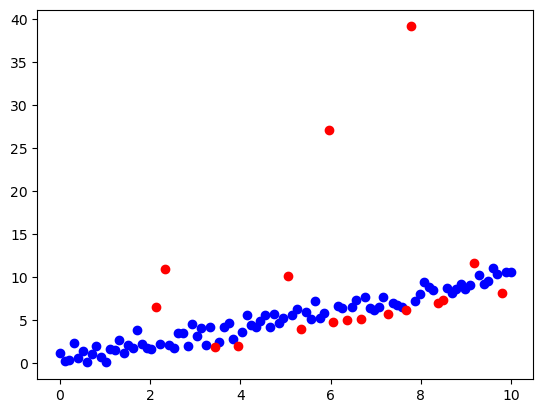

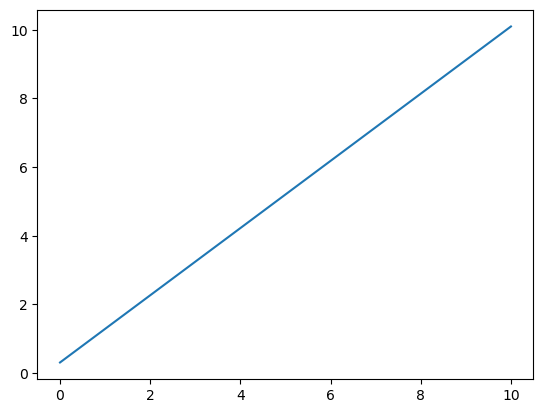

alpha: 0.1
outliers: 34


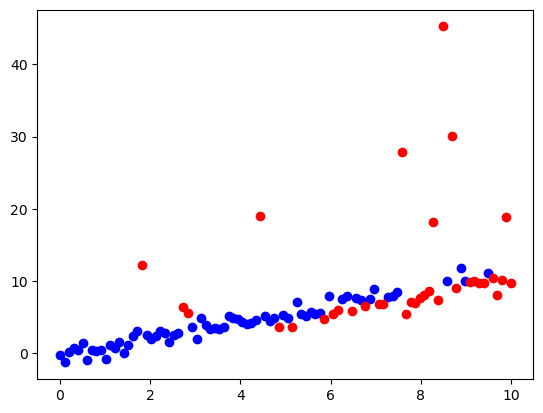

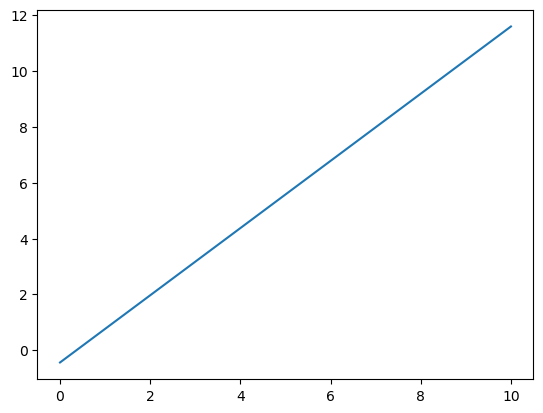

alpha: 0.15
outliers: 50


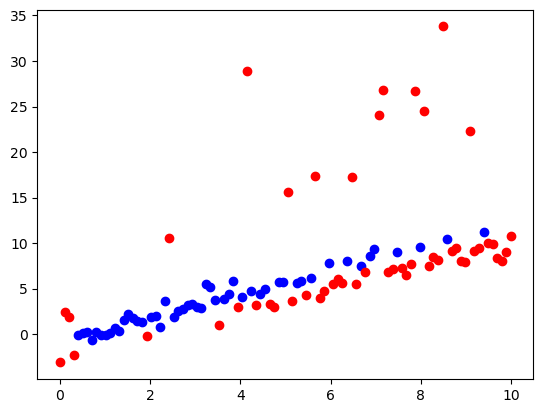

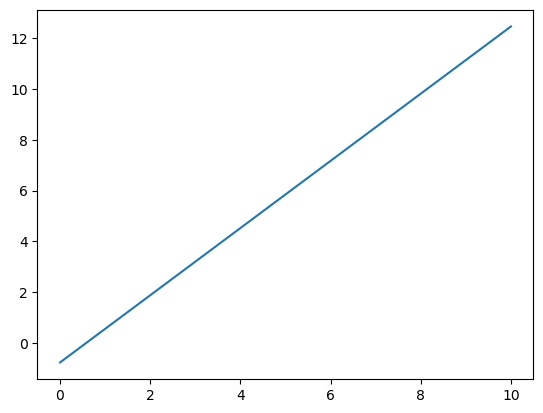

alpha: 0.2
outliers: 64


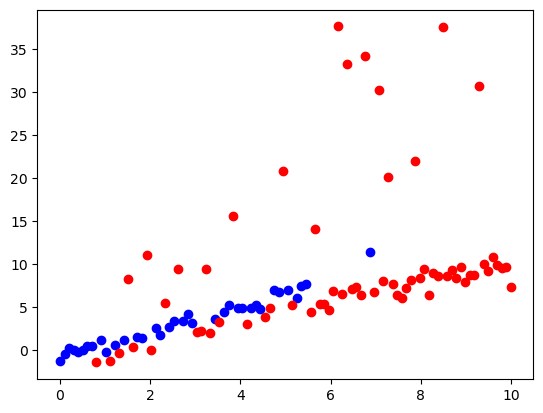

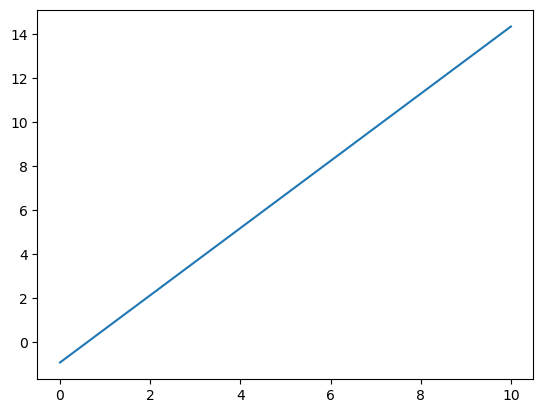

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def generateDataset(a, b, xmin, xmax, n, alpha, sigma):
    x = np.linspace(xmin, xmax, n)
    y_actual = a * x + b
    y_noisy = y_actual + np.random.normal(0, sigma, n)
    num_outliers = int(n * alpha)
    outliers_idx = np.random.choice(np.arange(n), size=num_outliers, replace=False)
    y_outlier = y_noisy.copy()
    y_outlier[outliers_idx] *= np.random.uniform(2, 5, num_outliers)
    return x, y_outlier, y_noisy, y_actual

def scatterPlot(x, y, outliers_idx):
    plt.scatter(x[~outliers_idx], y[~outliers_idx], color='blue')
    plt.scatter(x[outliers_idx], y[outliers_idx], color='red')
    plt.show()

def regressionDiagnostics(x, y, sigma, max_iter=5):
    outliers_idx = np.zeros(x.shape[0], dtype=bool)
    model = LinearRegression()
    for i in range(max_iter):
        model.fit(x[~outliers_idx].reshape(-1, 1), y[~outliers_idx])
        y_pred = model.predict(x[~outliers_idx].reshape(-1, 1))
        residual = np.abs(y[~outliers_idx] - y_pred)
        outliers_idx[~outliers_idx] = residual > 2 * sigma
        if not outliers_idx.any():
            break
    return model, outliers_idx

a = 1
b = 0
xmin = 0
xmax = 10
n = 100
sigma = 1

alphas = [0.05, 0.1, 0.15, 0.2]
for alpha in alphas:
    x, y_outlier, y_noisy, y_actual = generateDataset(a, b, xmin, xmax, n, alpha, sigma)
    model, outliers_idx = regressionDiagnostics(x, y_outlier, sigma)
    print("alpha:", alpha)
    print("outliers:", np.sum(outliers_idx))
    scatterPlot(x, y_outlier, outliers_idx)
    plt.plot(x, model.predict(x.reshape(-1, 1)))
    plt.show()

Question 4

outliers: 10


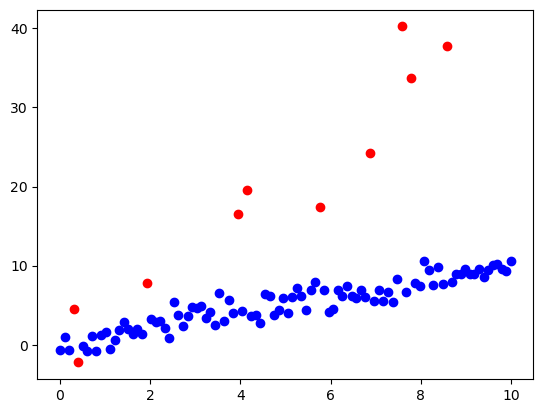

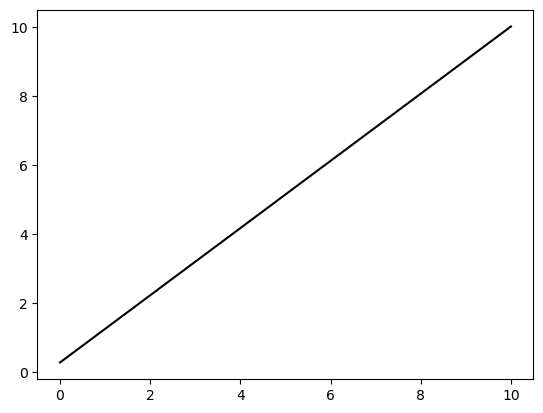

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

def generateDataset(a, b, xmin, xmax, n, alpha, sigma):
    x = np.linspace(xmin, xmax, n)
    y_actual = a * x + b
    y_noisy = y_actual + np.random.normal(0, sigma, n)
    num_outliers = int(n * alpha)
    outliers_idx = np.random.choice(np.arange(n), size=num_outliers, replace=False)
    y_outlier = y_noisy.copy()
    y_outlier[outliers_idx] *= np.random.uniform(2, 5, num_outliers)
    return x, y_outlier, y_noisy, y_actual

def scatterPlot(x, y, outliers_idx):
    plt.scatter(x[~outliers_idx], y[~outliers_idx], color='blue')
    plt.scatter(x[outliers_idx], y[outliers_idx], color='red')
    plt.show()

def performRANSAC(x, y, max_trials=100):
    model = RANSACRegressor(LinearRegression(), max_trials=max_trials, min_samples=50)
    model.fit(x.reshape(-1, 1), y)
    inlier_mask = model.inlier_mask_
    return model, inlier_mask

a = 1
b = 0
xmin = 0
xmax = 10
n = 100
alpha = 0.1
sigma = 1

x, y_outlier, y_noisy, y_actual = generateDataset(a, b, xmin, xmax, n, alpha, sigma)
model, inlier_mask = performRANSAC(x, y_outlier)
print("outliers:", np.sum(~inlier_mask))
scatterPlot(x, y_outlier, ~inlier_mask)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='black')
plt.show()